
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/logo_CV.jpeg" style="width:1500px;heigth:100px">
# Introduction to principal CNN architectures
## Computing deep features from pre-trained models

## <span style="color:red"> Outline </span> 
1. **Pre-trained CNN Models**
2. **CNN architectures**
3. **Computing dense CNN features**


In [0]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## <span style="color:green"> If you are in colaboratoy </span>: 

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/cv-uis-student/notebooks
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/cv-uis-student/notebooks'
/content/drive/My Drive/cv-uis-student/notebooks
/content/drive/My Drive/cv-uis-student/notebooks


## <span style="color:red"> 1.Pre-trained CNN Models </span> 

**CNN models are slowly but in training process**, then we can use a **pre-trained model**

- A pre-trained model is a model that was trained on a large benchmark dataset, for instance on image-net dataset. 
- It is almost impossible to built and train a large deep learning model without a robust computational support.
- You can improve an existing architecture, you dont start with an empty model. 
- **A new standard for industry best practices**
- You can use for  cases from **transfer learning**, **prediction**, and **feature extraction**

- **[ImageNet](http://www.image-net.org/):**  is a dataset of over 15 million labeled high-resolution images belonging to roughly 22,000 categories.
    - ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) 
    - 1000 images in each of 1000 categories

**Go to the action!**
    - We are going to load and use a very well know CNN architecture. In next subsection we explain a little about each strategy. 

In [0]:
model_ResNet50 = tf.keras.applications.ResNet50(weights='imagenet')
model_ResNet50.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
102973440/102967424 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112

## <span style="color:orange">student Challenge</span>: 
- Compare parameters with previous lecture for **CIFAR-3**

### <span style="color:red"> 1.1. Classification from Pre-trained models </span> 

<class 'PIL.Image.Image'>


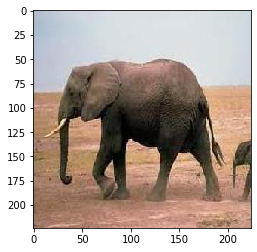

In [0]:
filename = '../data/image_set/elephant/image_0004.jpg'
im_ele = tf.contrib.keras.preprocessing.image.load_img(filename, target_size=(224, 224))
print ( type(im_ele))
ima_elep = tf.contrib.keras.preprocessing.image.img_to_array(im_ele)
ima_elep = np.expand_dims(ima_elep, axis=0);
plt.imshow(im_ele);

In [0]:
features_res = model_ResNet50.predict(ima_elep)
features_res.shape

(1, 1000)

In [0]:
tf.contrib.keras.applications.resnet50.decode_predictions(features_res)

40960/35363 [==================================] - 0s 0us/step


[[('n02504458', 'African_elephant', 0.876773),
  ('n01871265', 'tusker', 0.09088067),
  ('n02504013', 'Indian_elephant', 0.03163798),
  ('n02134084', 'ice_bear', 0.00013779165),
  ('n02132136', 'brown_bear', 5.4361884e-05)]]

Now we can try with an image out of learned classes

In [0]:

filename = '../imgs/u.png'
im_uis = tf.contrib.keras.preprocessing.image.load_img(filename, target_size=(224, 224))
print ( type(im_uis))
ima_uis = tf.contrib.keras.preprocessing.image.img_to_array(im_uis)
ima_uis = np.expand_dims(ima_uis, axis=0)
print (ima_uis.shape)

<class 'PIL.Image.Image'>
(1, 224, 224, 3)


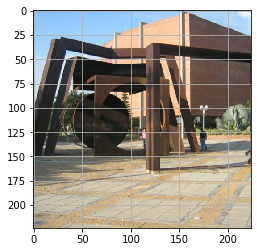

In [0]:
plt.imshow(im_uis), plt.grid();

In [0]:
features_res = model_ResNet50.predict(ima_uis)
tf.contrib.keras.applications.resnet50.decode_predictions(features_res)

40960/35363 [==================================] - 0s 0us/step


[[('n03447721', 'gong', 0.69486296),
  ('n03384352', 'forklift', 0.1704193),
  ('n04275548', 'spider_web', 0.031901143),
  ('n03017168', 'chime', 0.009059965),
  ('n03697007', 'lumbermill', 0.008010509)]]

What do you think about prediction??

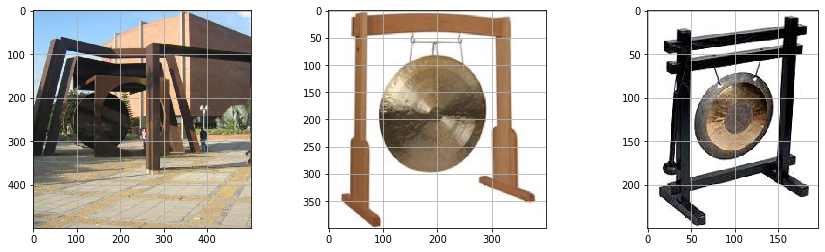

In [0]:
img1 = cv.cvtColor(cv.imread('../imgs/u.png'), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread('../imgs/u3.png'), cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(cv.imread('../imgs/u2.png'), cv.COLOR_BGR2RGB)

plt.figure(figsize=(15,4))
plt.subplot(131);
plt.imshow(img1), plt.grid();
plt.subplot(132)
plt.imshow(img2, cmap = plt.cm.Greys_r), plt.grid();
plt.subplot(133)
plt.imshow(img3, cmap = plt.cm.Greys_r), plt.grid();

## <span style="color:orange">Student Challenge</span>: 
- Take other images, within learned classes and other classes. Test the prediction capability
- Find an image that the output will be a wrong prediction

### <span style="color:red"> 1.2. Filter activations visualization from Pre-trained models </span> 

We cal also explore the learned filter on such pre-trained architectures. For instance we will load the VGG16 (in further subsection we explore the architecture) and visualize their respective filters. 

In [0]:
model_VGG16 = tf.keras.applications.VGG16(weights='imagenet')
model_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Computing Deep activation features

In [0]:
model_VGG16_conv1 = tf.keras.models.Model(inputs=model_VGG16.input, 
                                          outputs=model_VGG16.get_layer('block1_conv1').output)


Read one image and re-size on the size (224, 224) because model was trained with this size. 

In [0]:
features = model_VGG16.predict(ima_elep)
features_conv1 = model_VGG16_conv1.predict(ima_elep)
print (features.shape)
print (features_conv1.shape, features_conv1.shape[3])

(1, 1000)
(1, 224, 224, 64) 64


(224, 224) 0.0 707.66156


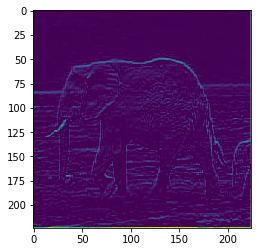

In [0]:
test =features_conv1[0,:,:, 10]
print( test.shape, np.min(test), np.max(test))
plt.imshow(test);


### Conv 1 features

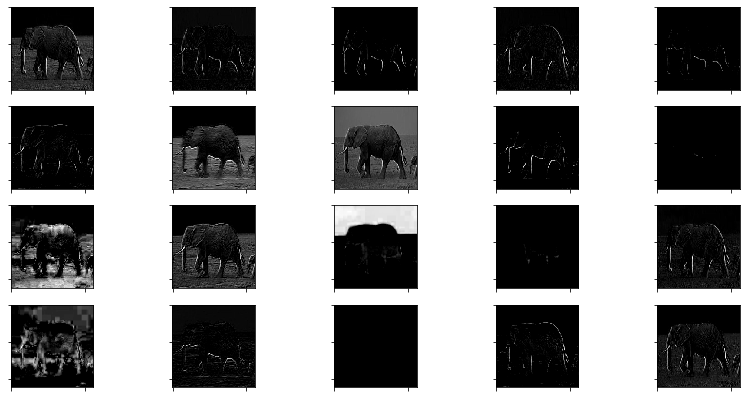

In [0]:
perm = np.random.permutation(range(features_conv1.shape[3]))[0:20]

fig = plt.figure(figsize=(14,7))
for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    plt.imshow(features_conv1[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## <span style="color:orange">Student Challenge</span>: 
- Plot other filters in high level layers, for instance `block2`, `block3`, `block5`

### Conv 2 features

### Conv 3 features

## Block 5, conv 3

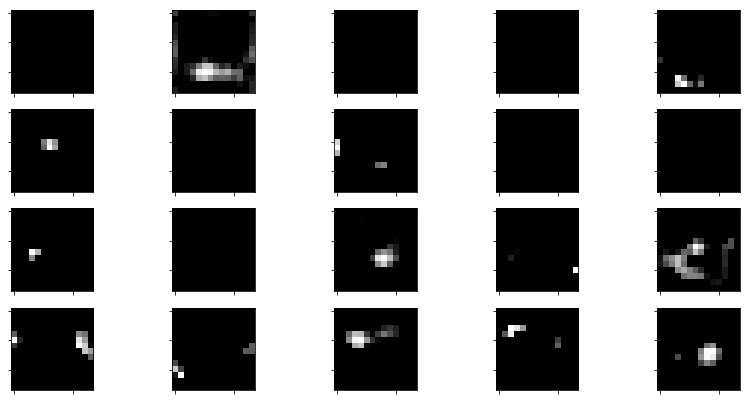

### <span style="color:red"> 1.3. Filter visualization from Pre-trained models </span> 


64 (3, 3, 3, 64)


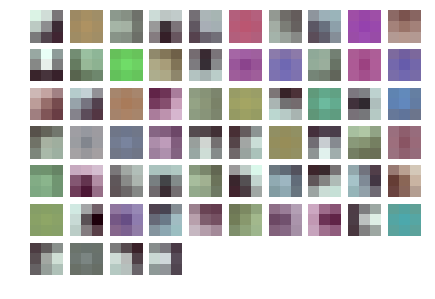

In [0]:
w = model_VGG16.get_weights()[0]
plt.figure(figsize=(7,7))
w = (w-np.min(w))/(np.max(w)-np.min(w))
print w.shape[-1], w.shape
for i in range(w.shape[-1]):
    plt.subplot(10,10,i+1)
    plt.imshow(w[:,:,:,i])
    plt.axis("off")

## <span style="color:orange">student Challenge</span>: 
   - Visualize filter responses from `VGG19` and `Resnet50`
   - Visualize filters in first layer. 


In [0]:
## <span style="color:red"> 2. CNN architectures </span> 


Today, there is many CNN architectures available for many different tasks. Among the most important, we can list: 


### <span style="color:red"> 2.1 LeNet </span> 
Proposed in [gradient-based learning applied to document recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf). Used on large scale to automatically classify hand-written digits 

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/lenet.png"> 

- CNNs are the foundation of modern state-of-the art deep learning-based computer vision.
-  It only has 7 layers, CNN: (C1, C3 and C5), Pool: (P1, P2) and Fully:(F1, F2)
- It was able to achieve error rate below 1% on the MNIST data set

### <span style="color:red"> 2.2 AlexNet </span> 

Proposed in [ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), it is the first large convolutional net.

The network is similar to LeNet  but deeper, with more filters stacked convolutional layers. 

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/Alexnet.png"> 
- Similar to Lenet but with 5 conv2D and 3 fully dense layers
- It was a winner of 2012 ImageNet ILSVRC challenge **(error 16.4)**
- Relu activation function is used instead of Tanh to add non-linearity
- Use dropout to deal with overfitting
- The kernels of the third convolutional layer are connected to all kernel maps in the second layer
- AlexNet takes 90 epochs which were trained for 6 days simultaneously on two Nvidia Geforce GTX 580 GPUs
- 60 million parameters

### <span style="color:red"> 2.3 VGGNet </span> 

Introduced in [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556). There exist two versions **VGG16**, **VGG19**

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/VGG.png"> 

The model achieves 92.7% top-5 on Imagenet and trained for weeks and was using NVIDIA Titan Black GPU’s.
- 16/19 connvolutional layers + pooling + fully connected
- Input is 224 x 224 x 3 images
- Filters are 3 x 3 that basically  capture the notion of left/right, up/down, center
- Five max-pooling layers
- Three Fully-Connected (FC) layers 
- Hidden layers have rectification (ReLU)
- It is slow and the model is over 533MB
- 180 million parameters
-  VGG NET win in ILSVRC 2014 with an error of **7.3**

### <span style="color:red"> 2.1 ResNet </span> 

Feedforward neural networks with shortcut connections. Proposed in [Deep Residual Learning for Image Recognition
](https://arxiv.org/pdf/1512.03385.pdf)


<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/resnet.png">

<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/resnet2.png">



- Deeper network starts to converge, a degradation problem has been exposed
- This architecture is easy to optimize, but the “plain” networks
- ResNet model has fewer filters and lower complexity than VGG nets
- More layers is better but because of the vanishing gradient problem
    - There is Resnet with 34, 101 and 152 layers
- Resnet win ILSVRC challence on 2015 with an **error 3.6**. 
### BETTER THAN HUMAN PERFORMANCE!

### <span style="color:red"> 2.1 GoogLeNet (Inception V1) </span> 

Proposed in [Going deeper with convolutions](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf?source=post_page---------------------------)

<img width="1000px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/Googlenet.png"> 

- Winner of Imagenet 2014 (Second position for VGG) 
- 7 million parameters
- **Network in networks:** It contains 1×1 Convolution at the middle of the network

<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/oneConv1.png"> 
A total of (14×14×48)×(5×5×480) = 112.9M operations
<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/OneConv2.png"> 

First: (14×14×16)×(1×1×480) = 1.5M

Second: (14×14×48)×(5×5×16) = 3.8M


Total.  1.5M + 3.8M = 5.3M

- Also reduce the overfitting problem. 
- A global average pooling is used at the end of the network instead of a fully connected layers
- Inception win the ILSRVC challenge of 2015 with an error of **3.38**



### <span style="color:red"> 2.1 InceptionV3 </span> 

Proposed in CVPR [Rethinking the Inception Architecture for Computer Vision](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Szegedy_Rethinking_the_Inception_CVPR_2016_paper.pdf?source=post_page---------------------------)

<img width="1000px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/inceptionv.png"> 


- **MODULE A: Factorizing Convolutions:**  reduce the number of connections/parameters without lost efficiency
    - Two 3×3 convolutions replaces one 5×5 convolution. 1 layer of 5x5=25. 2 layers of 3x3= (3x3)*2=18
        - 28% parameter reduction
<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/inception1.png"> 

- **MODULE B: Factorization Into Asymmetric Convolutions:**
    - a 3X3 filter is replaced by one filter of 3x1  followed by one 1x3 convolution
        - 3x3=9 but (1x3)+ (3x1) = 6 (33% parameter reduction)
    
<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/inception2.png">     

- **MODULE C: Factorization Into Asymmetric Convolutions:**

<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/inception3.png">



- It has a total of 42 layers, 
- lower error rate for image classification in ILSVRC in 2016
- Much more efficient than VGGNet


## <span style="color:orange">student Challenge</span>: 

- Change size of input in pretrained network. Is it possible?



# References

- https://neurohive.io/en/popular-networks/vgg16/

- https://medium.com/tensorflow/training-and-serving-ml-models-with-tf-keras-fd975cc0fa27

- https://keras.io/applications/

- https://planspace.org/20170502-canned_models_with_keras_in_tensorflow/


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">